## Student Performance Data Exploration, Feature Selection, and Prediction.

This Data analysis purpose is to do a confident feature selection on the most relevant factors affecting a student's academic performance. Measured in grades. The dataset is a sample of 395 students from 2 institutions in Brazil.  

This notebook's purpose is to:
- Coding the data explorations, descriptive and inferential statistics
- Writing interesting notes on the interpretations and findings
- Being the foundation of the final report

My initial idea was to only analyze one dataset. And perform the EDA with it only. But it would be very useful to generalize the correlations and intricacies of student performance in very different scenarios, and using more than 1 dataset from different countries could set the analysis free to be restricted to sociopolitical and economical issues that encompass what happens only inside one country. (Accounting for diversity of samples as much as I can). But given that I feel that the level of data manipulation necessary to do that is beyonf the scope of the course until this point, I will only do my best, of course, after the research on how to best accomplish a good data comparison of very different datasets that study the same phenomenon.

These are the datasets I will be doing the EDA on. They are listed in order of my perceied popularity:
1. https://archive-beta.ics.uci.edu/dataset/320/student+performance
> From 2 samples of students from 2 high schools in Portugal. This is the most popular one, and the one I'll start with, it has the most consistent and clear research and community studying it. There is a small Kaggle discussion forum for this dataset. I will be referencing some external EDA findings from them as well. To support my results.  

> This dataset is separated in 2 parts. The study of a Math course and a Portuguese course. I will merge the 2 datasets to analyze student performance more diversely across subjects.

2. https://archive.ics.uci.edu/ml/datasets/Student+Academics+Performance
> From Turkey. This dataset is significantly less popular and it was harder to find more information about it, the only research paper that they have is authored by the same authors of the dataset, both are from Near East University in Nicosia, Turkey. However, it is still valuble.

3. https://archive.ics.uci.edu/ml/datasets/Student+Academics+Performance
> From India. Dibrugarh University, Dibrugarh, Assam, India. I will probably not be referencing this dataset almost nothing. However if I do it would be to compare tings like correlations and covariances in the context of education interplays.

### Data Preparation

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# A function to make the .csv files readable for pandas dataframes, since they are not originally
def make_readable(filename):
    # Open the file in read mode and read its contents
    with open(filename, 'r') as file:
        file_contents = file.read()

    # Replace all instances of ';' with ','
    file_contents = file_contents.replace(';', ',')

    # Open the file in write mode and write the modified contents back to the file
    with open(filename, 'w') as file:
        file.write(file_contents)
    
    return file

In [4]:
# Importing the datasets
# Assigning variable names to each filepath
portugalMathFilepath = "datasets/portugal_math_student_data.csv"
portugalPortFilepath = "datasets/portugal_port_student_data.csv"

turkeyFilepath = "datasets/turkey_student_data.csv"


# Portugal Dataframes
portugalMathDataframe = pd.read_csv(portugalMathFilepath)
portugalPortDataframe = pd.read_csv(portugalPortFilepath)

# Turkey Data
turkeyDataframe = pd.read_csv(turkeyFilepath)

# India Data
# indiaFilepath = "" Maybe will do later

# Making all the datasets readable
make_readable(portugalMathFilepath)
make_readable(portugalPortFilepath)
# make_readable(turkeyFilepath) ## This file does not need formatting

<_io.TextIOWrapper name='datasets/portugal_port_student_data.csv' mode='w' encoding='cp1252'>

In [5]:
# Display the head and describe each dataframe in dataframes
portugalMathDataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


After the formatting with the function the file is read correctly. It seems to be a combination of categorical, and nominal data types. 33 features ad 395 observations. 

In [6]:
portugalPortDataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


This file is larger, it is part of the same study, but from the portuguese course, it has 649 observations.

I will now merge these dataframes

In [7]:
# Merge the 2 dataframes together
portugalDataframe = portugalMathDataframe.merge(portugalPortDataframe, how='outer', indicator=True)

# Get the rows that are in either df1 or df2 but not in both
portugalDataframe = portugalDataframe.loc[portugalDataframe['_merge'] != 'both']
# Rewriting the _merge column to account for a new categorical variable, the couse
# left only will be math and right only portuguese
# Replace 'left_only' with 'M' and 'right_only' with 'P'
portugalDataframe['_merge'] = portugalDataframe['_merge'].replace({'left_only': 'M', 'right_only': 'P'})

# If you want to rename the column from '_merge' to 'course', you can do it like this:
portugalDataframe = portugalDataframe.rename(columns={'_merge': 'course'})

# portugalDataframe_notCleaned
portugalDataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,M
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,M
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,M
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,M
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,P
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,P
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,P
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,P


I double checked to see if there was any duplicate row in either dataframe. But everything seemg OK so far. There is a total of 1044 observations. This sample size is large enough.

I will now classify the data types of the marged dataframe

When understading the variables, it was useful to have the official description from the dataset's website:

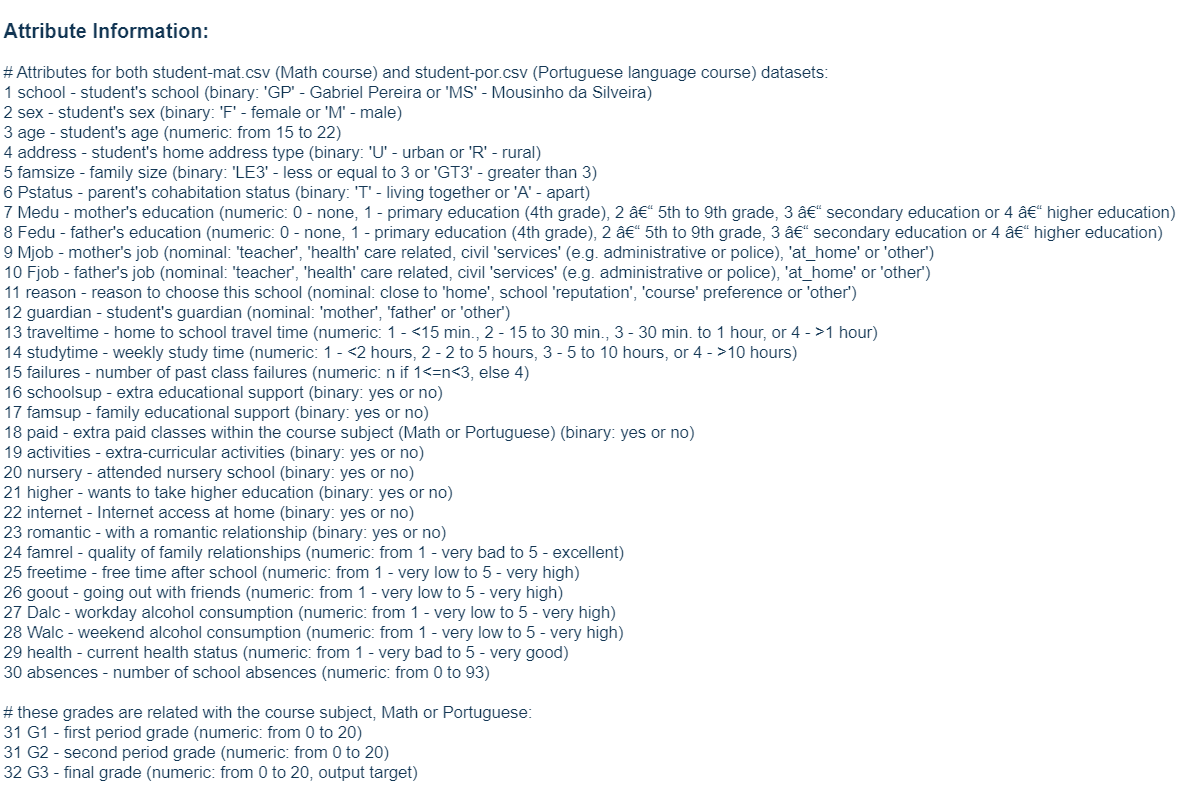

In [8]:
print(portugalDataframe.dtypes)

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
course        category
dtype: object


The last column '_merge' was created when I checked for duplicate observations. I will delete it, delete any rows with missing values, and prepare the data for analysis

In [9]:
# AVG grade of each student
# This is something that is done in one EDA from Kaggle. It works as a single measurment 
# of student performance and it is taking out the mean of the 3 grades
# meanGrade = (portugalDataframe.G1 + portugalDataframe.G2 + portugalDataframe.G3) / 3
# portugalDataframe['meanGrade'] = round(meanGrade)

# Now that I have a single heavy predictor, I can drop the rest of the grades, as they have a high
# collinearity between each other and can diminish the model value to extract important conclusions from the coefficients of grades.
# Also eliminate rows with nulls
portugalDataframe_cleaned = portugalDataframe.drop(columns = ['G1', 'G2']).dropna()

# Visualize the dataframe cleaned
portugalDataframe_cleaned

# Visualize the original dataframe  
# portugalDataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,M
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,M
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,M
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,M
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,P
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,16,P
1041,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,9,P
1042,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,P


In [10]:
# Print summary statistics for each column
print(portugalDataframe.describe(include='all'))

       school   sex          age address famsize Pstatus         Medu  \
count    1044  1044  1044.000000    1044    1044    1044  1044.000000   
unique      2     2          NaN       2       2       2          NaN   
top        GP     F          NaN       U     GT3       T          NaN   
freq      772   591          NaN     759     738     923          NaN   
mean      NaN   NaN    16.726054     NaN     NaN     NaN     2.603448   
std       NaN   NaN     1.239975     NaN     NaN     NaN     1.124907   
min       NaN   NaN    15.000000     NaN     NaN     NaN     0.000000   
25%       NaN   NaN    16.000000     NaN     NaN     NaN     2.000000   
50%       NaN   NaN    17.000000     NaN     NaN     NaN     3.000000   
75%       NaN   NaN    18.000000     NaN     NaN     NaN     4.000000   
max       NaN   NaN    22.000000     NaN     NaN     NaN     4.000000   

               Fedu   Mjob   Fjob  ...     freetime        goout         Dalc  \
count   1044.000000   1044   1044  ...  10

From this table I can see that in the age feature, there is an outlier that is 22 years old (more than 3 standard deviations from the mean), I would prefer to drop that case since it could alter the measures for central tendency and variance. 

In [11]:
# Dropping the outlier for age 
portugalDataframe_cleaned.drop(portugalDataframe_cleaned.index[portugalDataframe_cleaned['age'] > 20], inplace=True)
portugalDataframe_cleaned.age.describe()

count    1039.000000
mean       16.703561
std         1.199188
min        15.000000
25%        16.000000
50%        17.000000
75%        18.000000
max        20.000000
Name: age, dtype: float64

Now I dropped the outlier

#### ******************* The Turkey dataset glance

In [12]:
turkeyDataframe

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


This dataset is from another study, in Turkey. It has 145 observations and (by coincidence, 33 features as well)
All the data, including features. Are presented in a numerical form. They represent the question id in a questionnaire. Explained in the website.

https://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset#

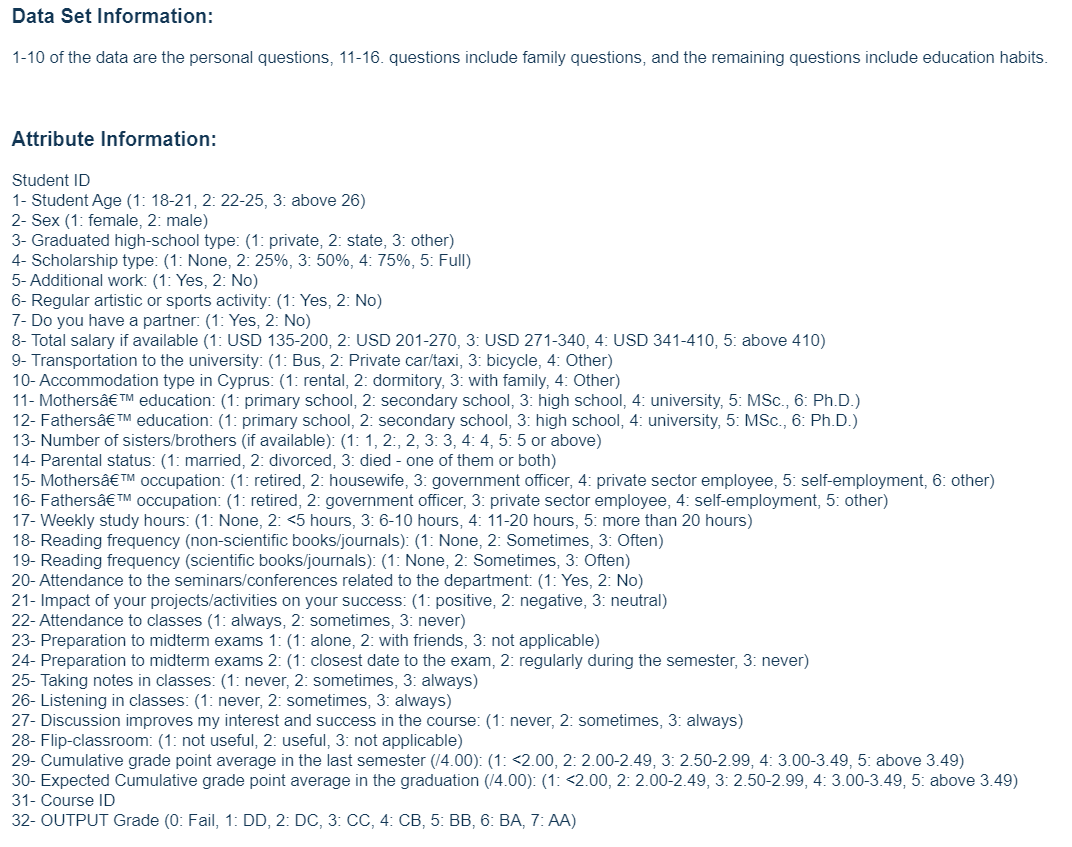

_As I mentioned earlier, for now I will only be working with the portugal students' dataset_

#### ********* End of Turkey Dataset glance

### Descriptive Satistics

I will start with the correlation matrix to have a general overview of where should I start looking at to be more selective at the features.

The guidelines state that "graphs,  frequency  tables, histograms, boxplots,scatterplots,measures   of   central   tendency,   variability,   correlation, covariance,  etc.).  Make  sure  to  check  for  outliers  (Boxplot  methodand  standard  deviations)  and Normality, decide  the  best  methods  to  deal  withthe  data.All  results  should  be  discussed  and supported by the literature."

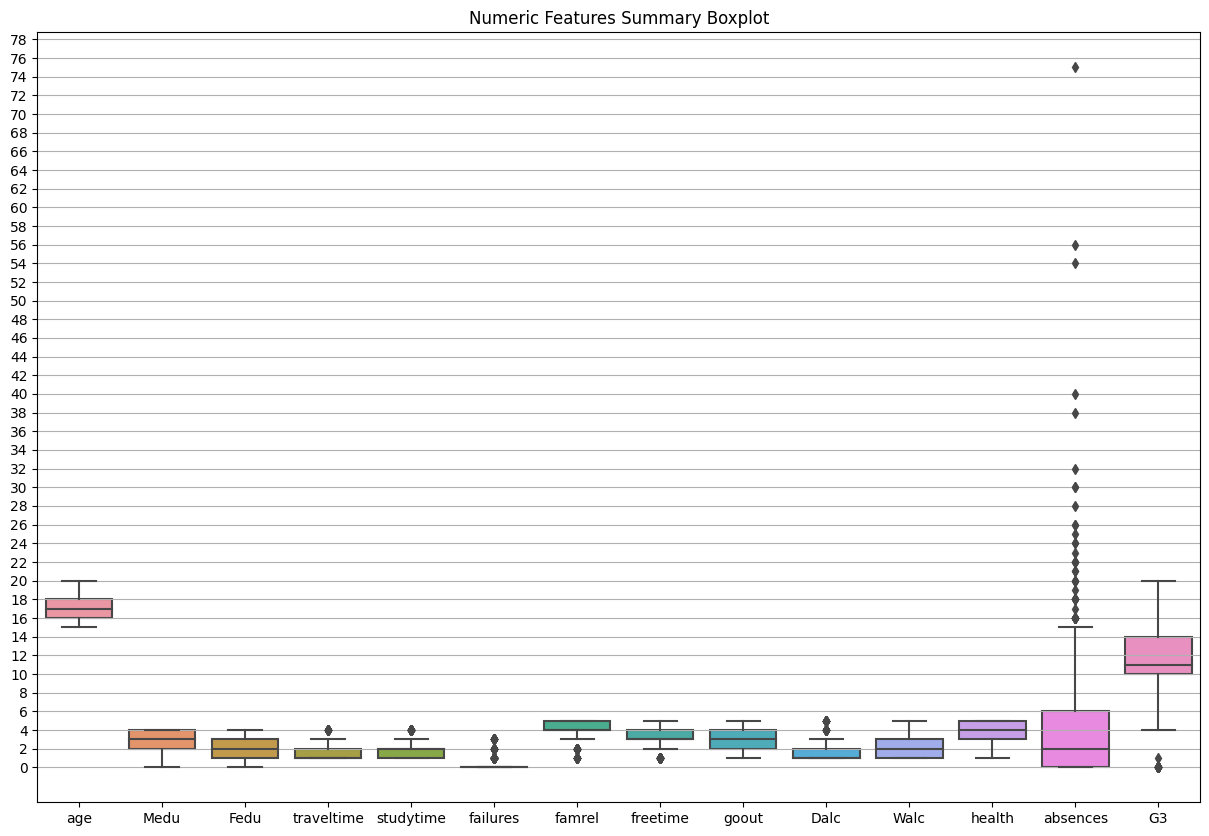

In [13]:
plt.figure(figsize=(15, 10))
plt.yticks(np.arange(0, 80, 2))
sns.boxplot(portugalDataframe_cleaned)
plt.grid(axis="y")
plt.title("Numeric Features Summary Boxplot")
plt.show()

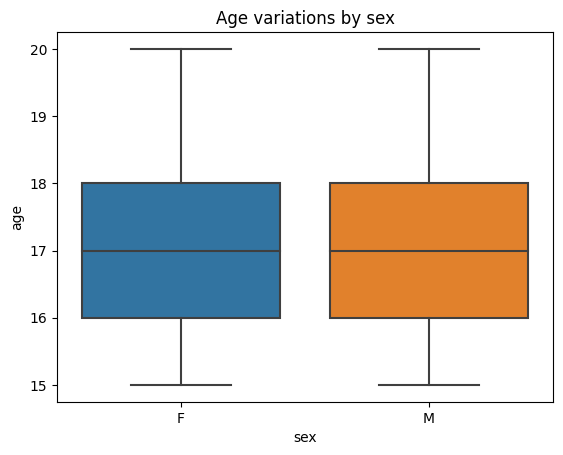

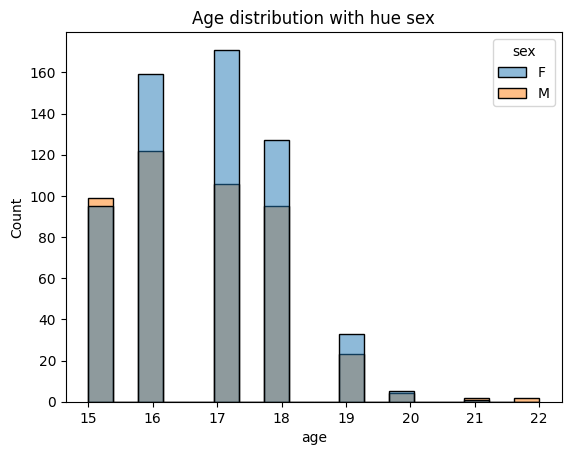

In [14]:
# Looking at the distribution of ages, which age group is this study adressing?
sns.boxplot(data=portugalDataframe_cleaned, y="age", x='sex')
plt.title("Age variations by sex")
plt.show()
sns.histplot(portugalDataframe, x="age", hue="sex")
plt.title("Age distribution with hue sex")
plt.show()

Seems to be a study of lower-secondary education (around 17 year olds). Except for one 22 year old in the study. Which is surprising to be that older than the mean male student. Apart from that, the ages seem to be fairly uniformly distributed accross the 1044 students.

What about the distribution of grades as such? are the grades normally distributed?

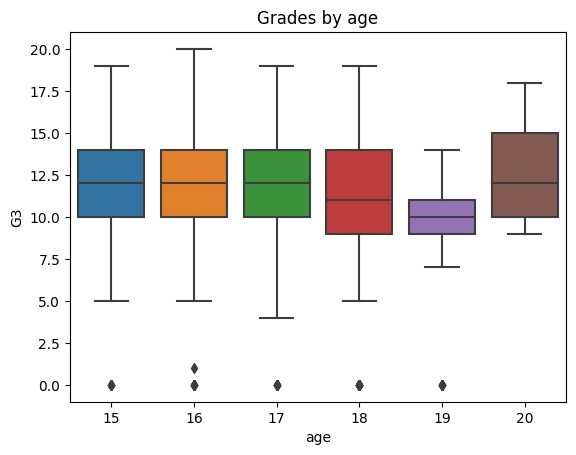

In [15]:
# How I will plot the distribution of grades by age and by sex again
sns.boxplot(portugalDataframe_cleaned, y="G3", x = 'age')
plt.title("Grades by age")
plt.show()

Mean		11.356111645813282
Std		3.8650450088046613
Variance	14.938572920085823
Skewness	-0.9952493928298063


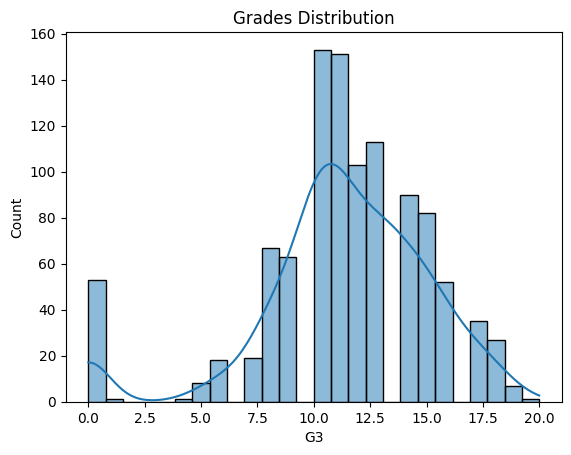

In [16]:
print(f"""Mean\t\t{portugalDataframe_cleaned["G3"].mean()}
Std\t\t{portugalDataframe_cleaned["G3"].std()}
Variance\t{portugalDataframe_cleaned["G3"].var()}
Skewness\t{portugalDataframe_cleaned["G3"].skew()}""")

sns.histplot(portugalDataframe, x = 'G3', kde = True)
plt.title("Grades Distribution")
plt.show()


The grades are approximately normal, they tend to a little bit higher than 10, the minimum grade for passing the courses. Funny enough, the 22 year old is getting the worst grades. It would be better to drop that student from our study, since it could have an effect on the distribution mean and variance. 

In [17]:
# This is an experiment. I will try to use ppscore to obtain the most 
# relevant preducting features for G3 

# pip install ppscore
# ! pip install pandas==1.3.3
import ppscore as pps

# Calculating the Predictive Power Score (PPS) matrix for all columns in the dataframe
pps_matrix = pps.matrix(portugalDataframe_cleaned)
pps_dataframe = pd.DataFrame(pps_matrix)


In [18]:
# pps_dataframe.loc[pps_dataframe['y'] == "G3"] # The models predicting mean grade

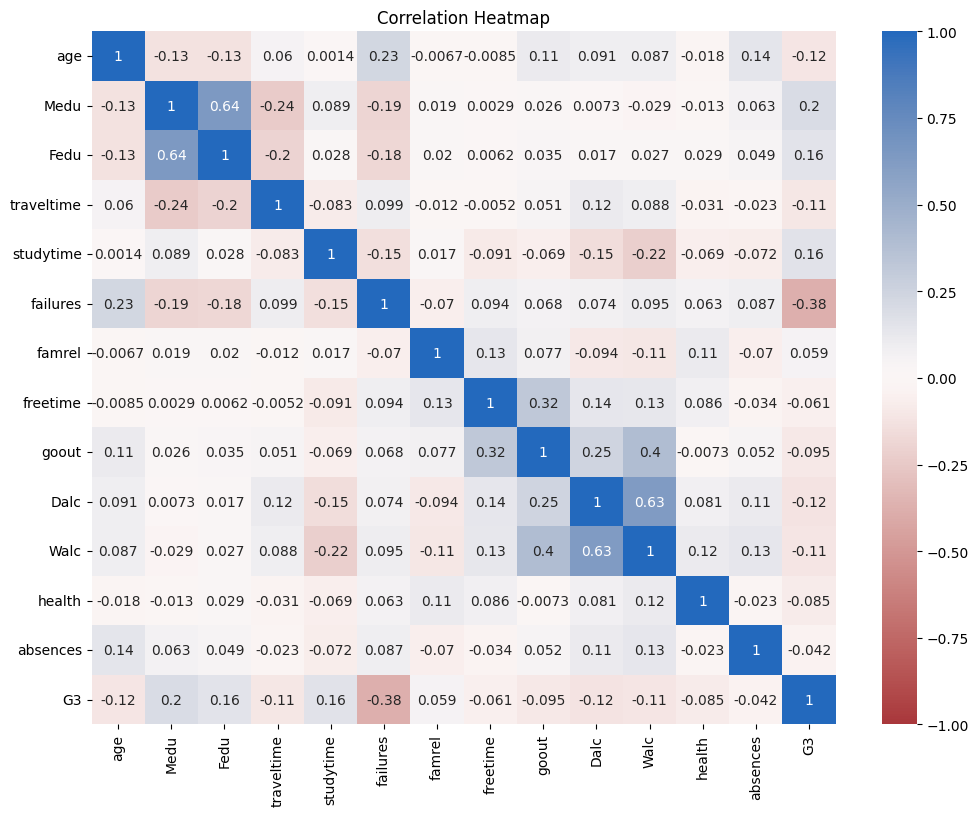

In [19]:
# Creating a filtered dataframe of only numerical variables
portugalDataframe_nums = portugalDataframe_cleaned.select_dtypes(include=['float64', 'int64'])

# Creating the correlation heatmap
plt.figure(figsize=(12,9))
sns.heatmap(portugalDataframe_nums.corr(), vmin=-1, cmap = "vlag_r", annot=True)
plt.title('Correlation Heatmap')
plt.show()

Its unfortunate that the mayority of the data findings cannot be represented in the heatmap, as I only can correlate numerical variables.

However. There are several interesting things to see here.
- Number of abscences does not correlate strongly with student performance
- Studytime correlates very little with performance
- Overall one of the most influential factors are parents' education level, they highly correlate between each other and are the most correlated with student performance among the rest of the features

I will now analyse the categorical variables

First. The distribution of students by school

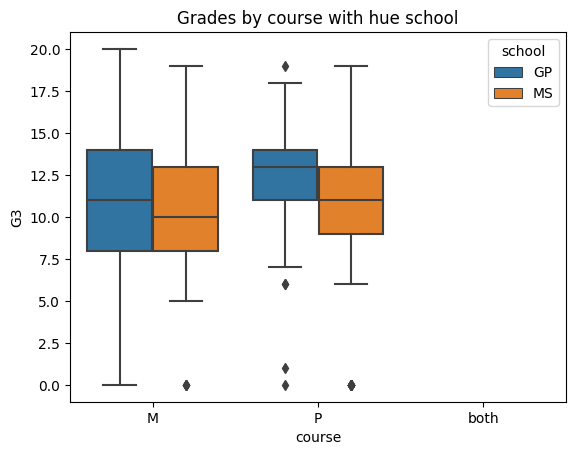

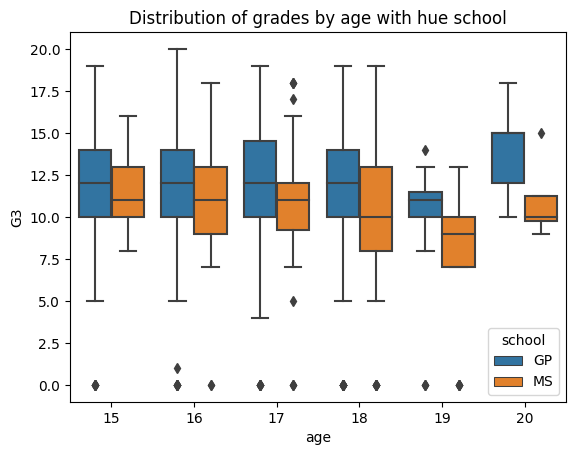

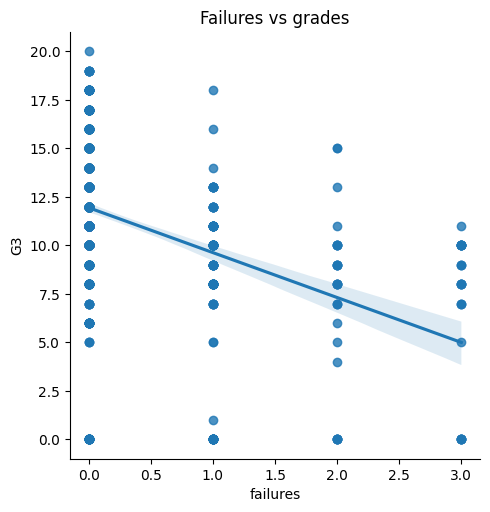

In [20]:
# The raw numbers of instances of school and sex distributions
# print(portugalDataframe_cleaned['school'].value_counts())
# print(portugalDataframe_cleaned['sex'].value_counts())

# Visualizing distribution of grades by age and school
# sns.boxplot(portugalDataframe_cleaned, y = 'G3', x = 'age', hue = 'school')

# Visualize the distribution of grades by course and school
sns.boxplot(portugalDataframe_cleaned, y = "G3", x = "course", hue = "school")
plt.title("Grades by course with hue school")
plt.show()
sns.boxplot(portugalDataframe_cleaned, x = "age", y = "G3", hue = "school")
plt.title("Distribution of grades by age with hue school")
plt.show()
sns.lmplot(portugalDataframe_cleaned, x = "failures", y = "G3")
plt.title("Failures vs grades")
plt.show()

There is something interesting here.
- There is more data about the school GP (Gabriel Pereira) than MS (Mousinho da Silveira) 
- It seems that age is correlated to how different students perform on average in these schools.

Now I will analyze the social and psychological features of the students.

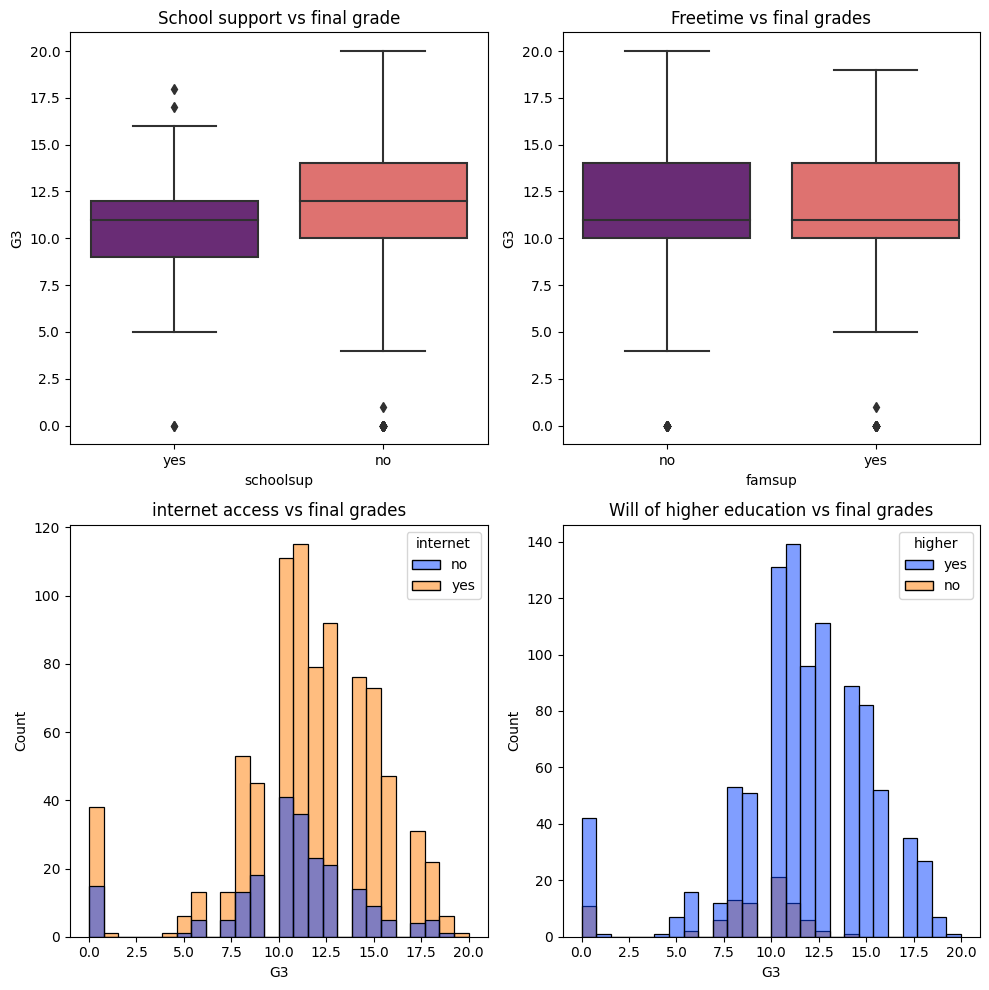

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

# school support vs final grade
sns.boxplot(data=portugalDataframe_cleaned, x="schoolsup",y = "G3", palette="magma",ax = axes[0,0])
axes[0, 0].set_title("School support vs final grade")

# family support vs final grade
sns.boxplot(data=portugalDataframe_cleaned, x="famsup", y="G3", palette="magma", ax=axes[0, 1])
axes[0, 1].set_title("Freetime vs final grades")

# internet access vs final grade
sns.histplot(data=portugalDataframe_cleaned, x="G3", hue="internet", palette="bright", ax=axes[1, 0])
axes[1, 0].set_title("internet access vs final grades")

# wants to take higher ed?
sns.histplot(data=portugalDataframe_cleaned, hue="higher", x="G3", palette="bright", ax=axes[1, 1])
axes[1, 1].set_title("Will of higher education vs final grades")


plt.tight_layout()
plt.show()

## Inferential Statistics

I must do:
- Confidence intervals of 3 variables
- Hypothesis Testing of one Sample of 3 variables
- Validate the results with existing literature

**Confidence Intervals (all with 95% level of confidence)**
- Mean Grades
- MG of students by Romantic desire to continue in higher education (yes and no)
- MG of student by going out with friends scale (from 1 to 5)

**Hypothesis Testing of one Sample**
- Mean Grades to Portugal Mean grades (In percentage scale)
- Mean Grades by sex to Portugal grades by sex (Men and Women) 
 
**Hypothesis Testing of two Samples for Interaction effects**
- "Wants to do higher ed" (yes or no) on Grades (maybe not verify but try)

**ANOVA Testing of multiple samples**
- Final Grades for each sample in the "goout" categorical variable. (comparison between 5 samples)

#### Confidence Intervals

In [22]:
# importing statsmodels
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Create a list for then visualizing all confidence intervals
intervals = []

# Confidence Interval for Mean Grades
confidence_interval_G3 = sms.DescrStatsW(portugalDataframe['G3']).tconfint_mean()
print(f'Confidence interval for "G3": {confidence_interval_G3}')
# Append the intervals to the list of intervals
intervals.append(confidence_interval_G3)
print()

# CI for mean grades by will of taking higher education
higher_no = portugalDataframe[portugalDataframe['higher'] == 'no']['G3']
higher_yes = portugalDataframe[portugalDataframe['higher'] == 'yes']['G3']

confidence_interval_higher_no = sms.DescrStatsW(romantic_no).tconfint_mean()
confidence_interval_higher_yes = sms.DescrStatsW(romantic_yes).tconfint_mean()
# Append intervals to the list of intervals
intervals.append(confidence_interval_higher_no)
intervals.append(confidence_interval_higher_yes)
# print the intervals for this feature
print(f'Confidence interval for "G3" with no interest in higher ed.: {confidence_interval_higher_no}')
print(f'Confidence interval for "G3" with interest in higer ed.: {confidence_interval_higher_yes}')
print()

# CI for each "goout" qualitative value
goout_categories = portugalDataframe['goout'].unique()

for category in goout_categories:
    goout_categories = portugalDataframe[portugalDataframe['goout'] == category]['G3']
    confidence_interval_goout_category = sms.DescrStatsW(goout_categories).tconfint_mean()
    intervals.append(confidence_interval_goout_category) # Append intervals to list of intervals for each one  
    print(f'Confidence interval for "G3" with "go out" category #{category}: {confidence_interval_goout_category}')

Confidence interval for "G3": (11.107245607973454, 11.57666243800356)



NameError: name 'romantic_no' is not defined

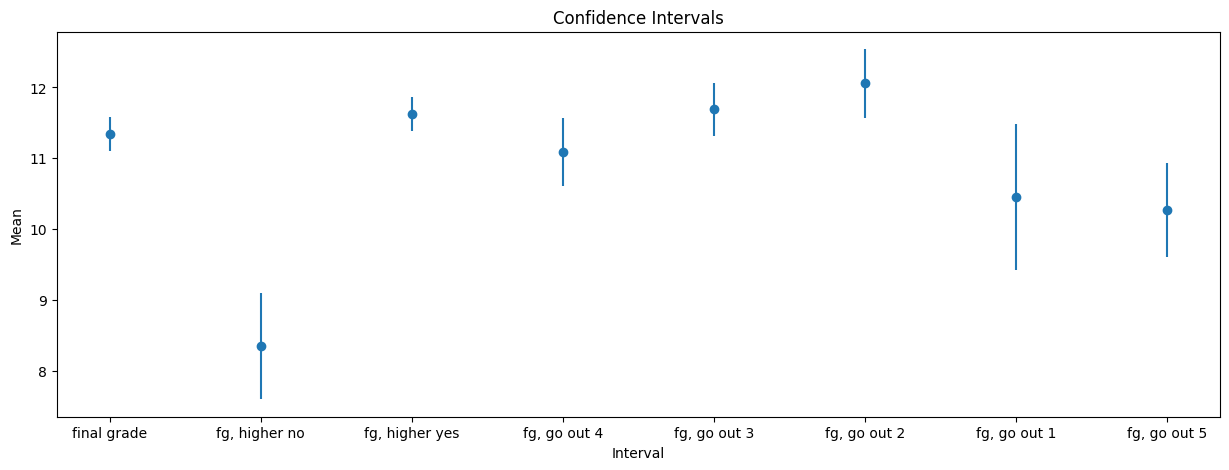

In [ ]:
# Calculate the means and errors for the error bars
means = [(upper + lower) / 2 for lower, upper in intervals]
errors = [(upper - lower) / 2 for lower, upper in intervals]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 5))
# Plot the error bars
ax.errorbar(range(len(means)), means, yerr=errors, fmt='o')

# Set the x-ticks and x-tick labels
ax.set_xticks(range(len(means)))
ax.set_xticklabels(['final grade', 'fg, higher no', 'fg, higher yes', 'fg, go out 4', 'fg, go out 3', 'fg, go out 2', 'fg, go out 1', 'fg, go out 5'])  # replace, appropriate labels

# Set the title and labels
ax.set_title('Confidence Intervals')
ax.set_xlabel('Interval')
ax.set_ylabel('Mean')

# Show the plot
plt.show()

### Assumptions
#### Normality
I will do a Q-Q plot to check for normality visually, along with a stat test to assume it formally.

ShapiroResult(statistic=0.7977627515792847, pvalue=1.0373734093960252e-09)
ShapiroResult(statistic=0.9176795482635498, pvalue=2.2514292183399414e-22)


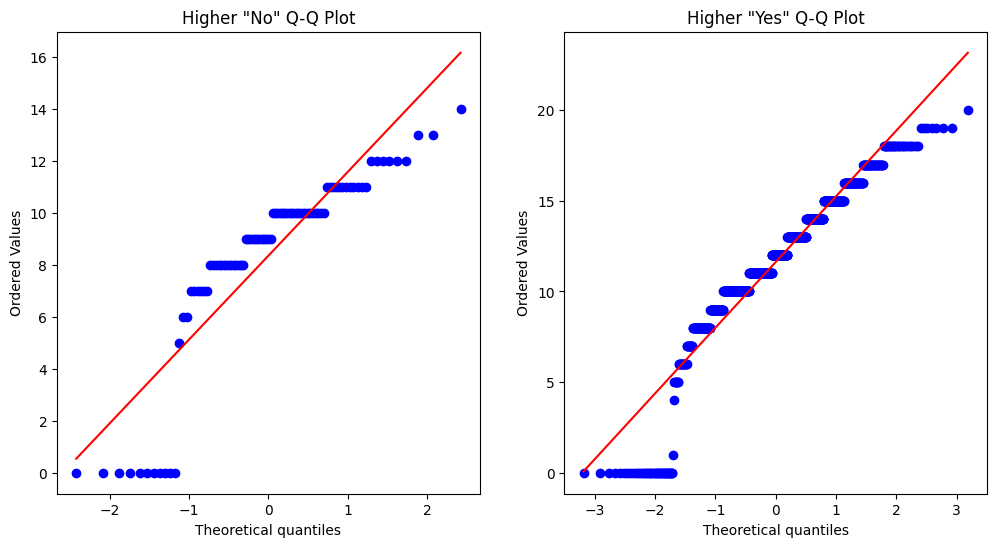

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
# Q-Q plot is used to check for normality

ss.probplot(higher_no, dist="norm", plot=axes[0])
axes[0].set_title('Higher "No" Q-Q Plot')

ss.probplot(higher_yes, dist="norm", plot=axes[1])
axes[1].set_title(f'Higher "Yes" Q-Q Plot')

# Shapiro-Wilk Test is also used to check, but as a statistical test.
print(ss.shapiro(higher_no))
print(ss.shapiro(higher_yes))

The samples for "higher" variable are aproximately normal

ShapiroResult(statistic=0.9306492209434509, pvalue=7.285465120077106e-09) 	for # 4
ShapiroResult(statistic=0.9268427491188049, pvalue=9.595322800204364e-12) 	for # 3
ShapiroResult(statistic=0.912743330001831, pvalue=7.45998471329834e-11) 	for # 2
ShapiroResult(statistic=0.8306800127029419, pvalue=1.477290965112843e-07) 	for # 1
ShapiroResult(statistic=0.920941174030304, pvalue=9.182016214026589e-08) 	for # 5


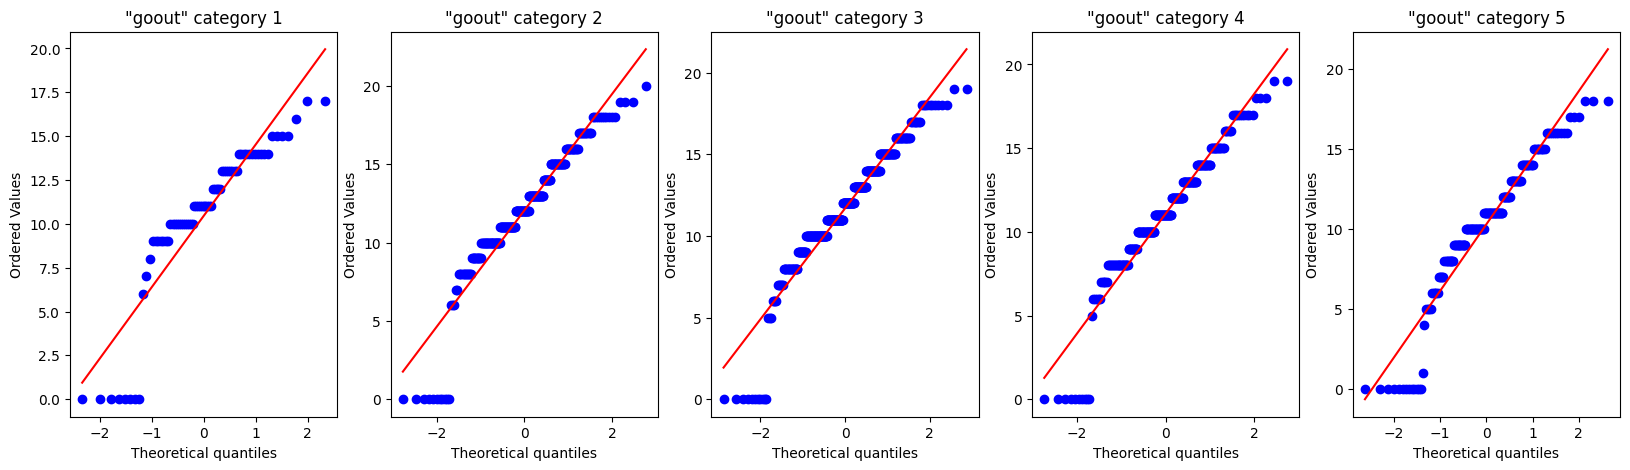

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20,5))
# Q-Q plot is used to check for normality
# For categories
goout_categories = portugalDataframe['goout'].unique()

for category in goout_categories:
    goout_data = portugalDataframe[portugalDataframe['goout'] == category]['G3']
    ss.probplot(goout_data, dist="norm", plot=axes[category - 1])
    axes[category - 1].set_title(f'"goout" category {category}')

    # Shapiro-Wilk Test is also used to check, but as a statistical test.
    print(f'{ss.shapiro(goout_data)} \tfor # {category}')

The samples of "goout" are also normally distributed.

even though the Shapiro test's p-value was lower than 0.05, the difference of the statistic to 0 was very low as well, and it is normal to have a lower p-value as the sample size increases, so, after watching the plots AND the shapiro test, I conclude that the data is indeed normally distributed.

#### Homogeneity of Variance

In [ ]:
# Levene's Test to check for homogeneity of variance.
print(ss.levene(higher_no, higher_yes))                         # For "higher"
ss.levene(*[portugalDataframe_cleaned[portugalDataframe_cleaned['goout']==category]["G3"] for category in goout_categories])    # For "goout"

LeveneResult(statistic=1.7086302918995935, pvalue=0.19145155131262367)


LeveneResult(statistic=1.1549038972216341, pvalue=0.3292684035563189)

### Hypothesis Test 1
- **Null Hypothesis**: The average grade of the sample is the same as the population mean grade score (sample to portugal comparison).
- **Alternative Hypothesis**: The average grade of the sample is different than the population mean grade score (sample to portugal comparison).

In [ ]:
import scipy.stats as ss

portugalDataframe_cleaned['gradePerc'] = portugalDataframe_cleaned['G3'] * 5  # multiply by 5 to convert from a scale of 0-20 to 0-100

# The portugal average score of educational outcome is 515.3 over 600
portMeanPerc = (525.2/625)*100 # http://documents.worldbank.org/curated/en/706141516721172989/Global-data-set-on-education-quality-1965-2015

# One sample testing
t_statistic, p_value = ss.ttest_1samp(portugalDataframe_cleaned['gradePerc'], portMeanPerc)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')

T-statistic: -45.45406177653802, P-value: 3.765037059188488e-249


We reject the null. This sample is different by -45.46 points. With a probability of this to happen by randomness of almost 0%

In [ ]:
# Create a new DataFrame with only men
df_men = portugalDataframe_cleaned[portugalDataframe_cleaned['sex'] == 'M']

# Create a new DataFrame with only women
df_women = portugalDataframe_cleaned[portugalDataframe_cleaned['sex'] == 'F']

### Hypothesis Test 2
- **Null Hypothesis**: The average grade for men in the sample is the same as the population mean grade score (sample to portugal comparison).
- **Alternative Hypothesis**: The average grade for men in the sample is different than the population mean grade score (sample to portugal comparison).

In [ ]:
# The portugal average score of educational outcome is 515.3 over 600
portMeanPerc = (525.2/625)*100 # http://documents.worldbank.org/curated/en/706141516721172989/Global-data-set-on-education-quality-1965-2015

# One sample testing
t_statistic, p_value = ss.ttest_1samp(df_men['gradePerc'], portMeanPerc)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')

T-statistic: -30.661385504072605, P-value: 4.393463764292326e-112


We reject the null. This sample is different by -30.66 points. With a probability of this to happen by randomness of almost 0%

### Hypothesis Test 3
- **Null Hypothesis**: The average grade for women in the sample is the same as the population mean grade score (sample to portugal comparison).
- **Alternative Hypothesis**: The average grade for women in the sample is different than the population mean grade score (sample to portugal comparison).

In [ ]:
# The portugal average score of educational outcome is 515.3 over 600
portMeanPerc = (525.2/625)*100 # http://documents.worldbank.org/curated/en/706141516721172989/Global-data-set-on-education-quality-1965-2015

# One sample testing
t_statistic, p_value = ss.ttest_1samp(df_women['gradePerc'], portMeanPerc)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')

T-statistic: -33.569671751947894, P-value: 7.03040735824691e-139


We reject the null. This sample is different by -33.56 points. With a probability of this to happen by randomness of almost 0%

### Hypothesis Test of two known samples to ckeck for interaction effects
### Hypothesis Test 4
- **Null Hypothesis**: The grades for students that want to take higher education are on average the same as of the students who don't want to.
- **Alternative Hypothesis**: The average grade of students that want to take higer education are on average different as of the students who don't want to.

In [ ]:
# Create the two samples
sample_1 = portugalDataframe_cleaned[portugalDataframe_cleaned['higher'] == 'yes']['G3']
sample_2 = portugalDataframe_cleaned[portugalDataframe_cleaned['higher'] == 'no']['G3']

# Perform the t-test
t_stat, p_val = ss.ttest_ind(sample_1, sample_2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: 7.68185829714147
P-value: 3.619031073465375e-14


We reject the Null Hypothesis, and as we found out in the boxplot from before, there is certainly a significant difference of the mean final grade for those who want to take higer education as opposed to those who don't want to. A difference of 7 more points.  

### Hypothesis Test ANOVA to test for a difference in the sample means
### Hypothesis Test 5
- **Null Hypothesis**: The grades for the students do not depend on how much do they go out with their friends.
- **Alternative Hypothesis**: The grades of the students depend on how much do they go out with their friends.

In [ ]:
from scipy.stats import f_oneway
# Create the samples
samples = [portugalDataframe_cleaned[portugalDataframe_cleaned['goout'] == i]['G3'] for i in range(1,6)]

# Perform the ANOVA
f_stat, p_val = ss.f_oneway(*samples)

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_val}')  
print()

# Perform post hoc Tukey and bonferroni tests to determine which sample was significantly different
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(portugalDataframe_cleaned['G3'], portugalDataframe_cleaned['goout'], alpha=0.01)

# Print the results
print(tukey)

F-statistic: 6.993324259556865
P-value: 1.4834871220226462e-05

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2    1.606 0.0159 -0.0731  3.2851  False
     1      3    1.258 0.0873  -0.372   2.888  False
     1      4   0.6418 0.7307 -1.0537  2.3374  False
     1      5  -0.1277 0.9993 -1.9041  1.6487  False
     2      3   -0.348 0.8146 -1.3951  0.6991  False
     2      4  -0.9642 0.0484 -2.1107  0.1823  False
     2      5  -1.7337 0.0001 -2.9967 -0.4707   True
     3      4  -0.6162 0.3323 -1.6895  0.4571  False
     3      5  -1.3857 0.0016 -2.5827 -0.1888   True
     4      5  -0.7695 0.2893 -2.0543  0.5153  False
----------------------------------------------------


From the tukey table, we can see that the significant (with alpha value of 0.01) differences emerge between:
- 2 and 5 with -1.73
- 3 and 5 with -1.39

This means that there is an effect of going out in grades, however that effect is very subtle. So the conclusion would be that going out with friends has an effect, but is only perceivable between students at relatively opposite sides of the spectrum.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# assuming df is your DataFrame and 'category' is the name of the column with categorical data
df_encoded = pd.get_dummies(portugalDataframe_cleaned)

# Now df_encoded can be used with RandomForestRegressor

In [48]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df_encoded.G3, test_size=0.2, random_state=42)

models = {}
errorValues = []

# Create several models to test the best one out of 100
for i in range(100):
    # Create a random forest regressor
    regr = RandomForestRegressor(n_estimators=100)

    # Train the regressor
    regr.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = regr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred, squared=False)

    if mse <= 0.03:
        models[mse] = regr
        errorValues.append(mse)

In [49]:
def get_best_model(models, errorValues):
    return models[min(errorValues)]

model = get_best_model(models, errorValues)

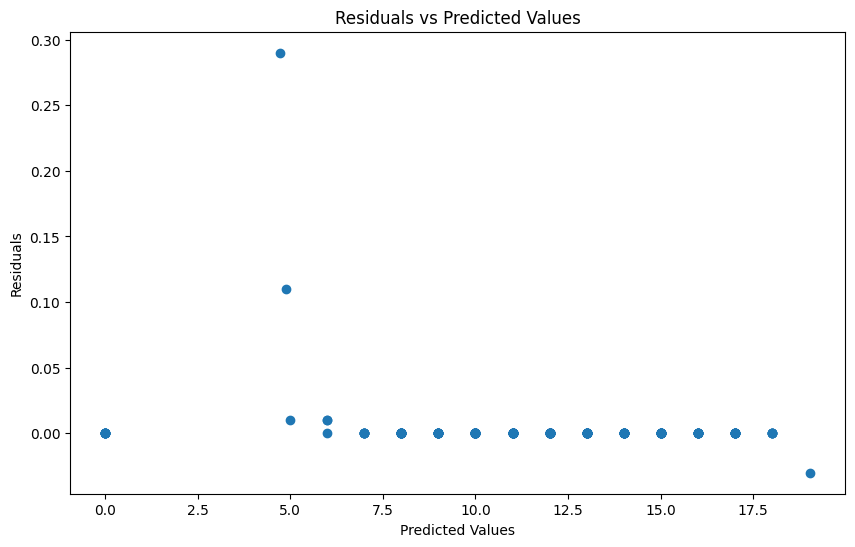

C:\Users\rbelt\AppData\Local\Temp\ipykernel_36568\366256843.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


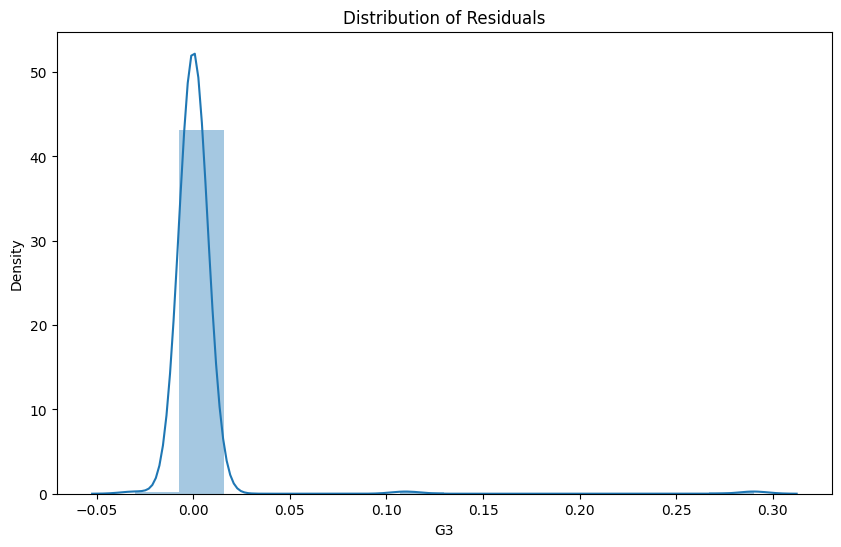

Root Mean Squared Error: 0.021639529356463173


In [51]:
# Predict the values
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plotting the distribution of residuals
plt.figure(figsize=(10,6))
sns.distplot(residuals)
plt.title('Distribution of Residuals')
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")